<a href="https://colab.research.google.com/github/SHIO777/Controller/blob/master/%E7%86%B1%E5%B7%A5%E5%AD%A6%E5%AE%9F%E9%A8%93.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1200 sec後の温度分布
lam= 350
p= -20
q= 2000.0
T0= 30.3
h= 35


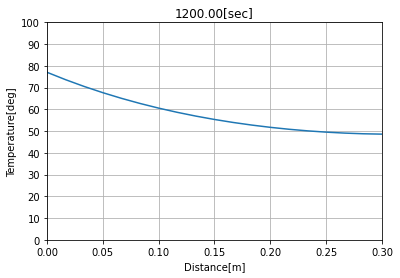

In [ ]:

#スクショはcommand shift 3
import numpy as np
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
PI=math.pi
D=0.02
A=0.25*PI*D*D
S=PI*D
#物性値
#１．タフピッチ銅(C1100)
#密度：8940[kg/m^3]
#等圧比熱：385[J/(kg・K)]
#熱伝導率：391[W/(m・K)]
#２．機械構造用炭素鋼(S45C)
#密度：7850[kg/m^3]
#等圧比熱：440[J/(kg・K)]
#熱伝導率：41[W/(m・K)]
#３．アルミ合金(A2017)
#密度：2790[kg/m^3]
#等圧比熱：900[J/(kg・K)]
#熱伝導率：201[W/(m・K)]
rho=8940
c=385
lam=391       #####################
a=lam/(rho*c)
L=.3
NX=18
#print(NX)
x=[]
DX=L/float(NX)
for i in range(NX+1):
    x.append(DX*i)
TEND=1200      #####################
NT=12000
t=[]
DT=TEND/float(NT)
for i in range(NT+1):
    t.append(DT*i)
p=-20          ###################### ここはマイナス
q=2000.0       #####################
T0=30.3        #####################
xheater=0.1
h=35          #######################

b= h/(rho*c)
TEMP1=[]
TEMP2=[]
for i in range(NX+1):
    TEMP1.append(T0)
    TEMP2.append(T0)
for i in range(NT):
    for j in range(NX+1):
        if j == 0:
            TEMP2[j]=TEMP1[j]+((p*TEMP1[j]+q)*DT)/(PI*c*rho*D*xheater)
        if 0 < j < NX:
            TEMP2[j]=TEMP1[j]+a*(TEMP1[j-1]-2.*TEMP1[j]+TEMP1[j+1])*(DT)/(DX*DX)+b*(T0-0.5*(TEMP1[j+1]+TEMP1[j]))*(S/A)*DT
        if j == NX:
            TEMP2[j]=TEMP1[j]-a*(TEMP1[j]-TEMP1[j-1])*(DT)/(DX*DX)+b*(T0-0.5*(TEMP1[j]+TEMP1[j-1]))*(S/A)*DT+b*(T0-TEMP1[j])*(DT/DX)
    #print('{:.2f}'.format(t[i+1]),"sec")
    for j in range(NX+1):
        TEMP1[j]=TEMP2[j]
#print()
print('{:.6g}'.format(t[i+1]),"sec後の温度分布")
print ("lam=", lam) 
print ("p=",p) 
print("q=",q)
print("T0=",T0)
print("h=",h)

#for j in range(NX+1):
 #  print('{:.2f}'.format(x[j])," ",'{:.5f}'.format(TEMP1[j]))

plt.figure(1)
plt.xlim(0.,.3)
plt.ylim(0.,100.)
plt.yticks([0,10,20,30,40,50,60,70,80,90,100])
plt.grid()
plt.title('{:.2f}[sec]'.format(TEND))
plt.xlabel("Distance[m]")
plt.ylabel("Temperature[deg]")
plt.plot(x,TEMP2)
plt.show()
